In [6]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import backtrader as bt

# Download S&P 500 index and its constituents data
sp500_components = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
symbols = sp500_components['Symbol'].tolist()

# Download historical data for the last 6 months
end_date = datetime.now()
start_date = end_date - timedelta(days=180)
data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [7]:
three_months = data.pct_change(periods=63).iloc[-1]
one_month = data.pct_change(periods=21).iloc[-1]
two_weeks = data.pct_change(periods=10).iloc[-1]

# Combine into a single DataFrame
performance = pd.DataFrame({
    'Three_Months': three_months,
    'One_Month': one_month,
    'Two_Weeks': two_weeks
})

In [16]:
top_n = 0.1  # Top 10%
top_three_months = performance['Three_Months'].nlargest(int(len(performance)))
top_one_month = performance['One_Month'].nlargest(int(len(performance)))
top_two_weeks = performance['Two_Weeks'].nlargest(int(len(performance)))

In [17]:
combined_performance = (top_three_months + top_one_month + top_two_weeks) / 3
ranked_stocks = combined_performance.nlargest(int(len(performance) * top_n))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<IPython.core.display.Javascript object>


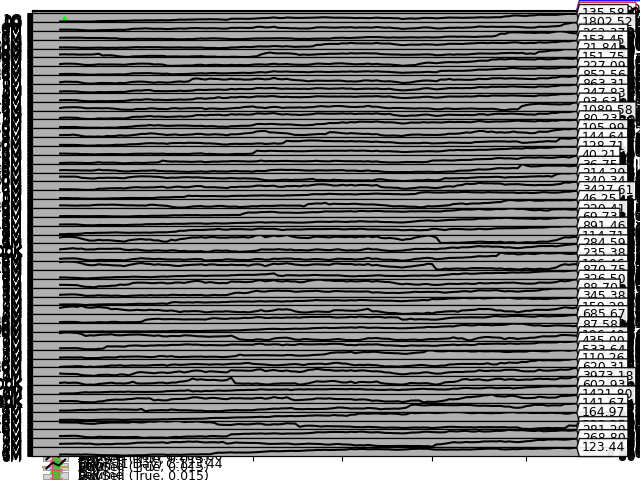

[[<Figure size 640x480 with 102 Axes>]]

In [18]:
# Define a simple strategy
class MomentumStrategy(bt.Strategy):
    def __init__(self):
        self.ranked_stocks = ranked_stocks.index.tolist()
        self.datamap = {d._name: d for d in self.datas}
    
    def next(self):
        for stock in self.ranked_stocks:
            data = self.datamap.get(stock)
            if data and self.getposition(data).size == 0:
                self.buy(data=data, size=100)  # Adjust size as needed

# Create a Cerebro entity
cerebro = bt.Cerebro()
cerebro.addstrategy(MomentumStrategy)

# Add data to Cerebro
for symbol in ranked_stocks.index:
    data = bt.feeds.PandasData(dataname=yf.download(symbol, start=start_date, end=end_date))
    cerebro.adddata(data, name=symbol)

# Run the backtest
cerebro.run()

# Plot the result
#cerebro.plot()

In [19]:
ranked_stocks 

NVDA    0.382466
AVGO    0.369495
FSLR    0.364198
MU      0.356828
HPE     0.262679
TER     0.235335
QCOM    0.225635
MPWR    0.218253
KLAC    0.190823
AMAT    0.190548
BBY     0.184563
LRCX    0.184115
WDC     0.179748
STX     0.166926
ORCL    0.166336
NTAP    0.166150
GLW     0.159130
HPQ     0.158893
AAPL    0.149405
ANET    0.136990
CMG     0.135024
IP      0.134267
CEG     0.133737
APH     0.130575
LLY     0.127341
QRVO    0.124930
ESS     0.121756
ADI     0.121570
SWKS    0.118438
COST    0.112585
CDNS    0.104865
IRM     0.103900
TT      0.103744
EXR     0.103039
NFLX    0.098045
VST     0.097589
PODD    0.093388
ISRG    0.091470
DPZ     0.091094
TJX     0.087059
SNPS    0.086571
BKNG    0.085784
MCK     0.083231
FICO    0.083155
KMB     0.082646
GE      0.082603
ADBE    0.082370
PWR     0.082205
VRSK    0.082011
TRGP    0.081721
dtype: float64

In [20]:
sp500_components

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [21]:
performance

,Three_Months,One_Month,Two_Weeks
A,-0.083254,-0.125332,0.030951
AAL,-0.190237,-0.234216,-0.019130
AAPL,0.217004,0.128614,0.102598
ABBV,-0.037291,0.029684,0.056864
ABNB,-0.089622,0.011190,0.001428
...,...,...,...
XYL,0.095658,-0.018021,0.023851
YUM,-0.008774,-0.039351,-0.043239
ZBH,-0.156082,-0.112248,-0.059503
ZBRA,0.035275,-0.071220,-0.024837


In [22]:
ranked_stocks

NVDA    0.382466
AVGO    0.369495
FSLR    0.364198
MU      0.356828
HPE     0.262679
TER     0.235335
QCOM    0.225635
MPWR    0.218253
KLAC    0.190823
AMAT    0.190548
BBY     0.184563
LRCX    0.184115
WDC     0.179748
STX     0.166926
ORCL    0.166336
NTAP    0.166150
GLW     0.159130
HPQ     0.158893
AAPL    0.149405
ANET    0.136990
CMG     0.135024
IP      0.134267
CEG     0.133737
APH     0.130575
LLY     0.127341
QRVO    0.124930
ESS     0.121756
ADI     0.121570
SWKS    0.118438
COST    0.112585
CDNS    0.104865
IRM     0.103900
TT      0.103744
EXR     0.103039
NFLX    0.098045
VST     0.097589
PODD    0.093388
ISRG    0.091470
DPZ     0.091094
TJX     0.087059
SNPS    0.086571
BKNG    0.085784
MCK     0.083231
FICO    0.083155
KMB     0.082646
GE      0.082603
ADBE    0.082370
PWR     0.082205
VRSK    0.082011
TRGP    0.081721
dtype: float64

In [23]:
combined_performance

A      -0.059212
AAL    -0.147861
AAPL    0.149405
ABBV    0.016419
ABNB   -0.025668
          ...   
XYL     0.033829
YUM    -0.030455
ZBH    -0.109278
ZBRA   -0.020261
ZTS    -0.018159
Length: 503, dtype: float64